In [19]:
import pywt
import numpy as np
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
m=pd.DataFrame()
loc=(r'C:\Users\etudiant\Downloads\Music\Music\trial.xlsx')

df = pd.read_excel(loc)   #loading the file 
            
dx=pd.DataFrame(df,columns=['T6 -O2 ']) 
m=m.append(dx) 
            
        
print("donee!")
x1=m.dropna()
print(x1)
x=[]

x=x1['T6 -O2 '].tolist()

coeffs = pywt.wavedec(x, 'db7', level=4)
#cA2, cD2, cD1 = coeffs
cD4, cA4, cA3, cA2, cA1= coeffs 
data=cA1
print("fdddkl",data)
print(cA2)
for i in range (5):
    print("hi",i,"       ",coeffs[i])

donee!
   T6 -O2 
0      1.0
1      2.0
fdddkl [ 0.65671 -0.65671  0.65671 -0.65671  0.65671 -0.65671  0.65671]
[-0.12466463  0.50607863  0.31387283  0.35252479 -0.26633595 -0.43039833
 -0.35107734 -0.12466463  0.50607863  0.31387283]
hi 0         [6.13090225 6.1222128  6.05259731 6.09431911 6.12630221 6.17900291
 6.12904862 6.05984509 6.1090383  6.0476366  6.24156207 6.13090225]
hi 1         [-0.05365949  0.15996253  0.02351979  0.03336469 -0.07384703  0.03300301
 -0.02391062  0.04171757  0.01349982 -0.06801222 -0.08563806 -0.05365949]
hi 2         [ 0.14066734 -0.26646583  0.10761833 -0.11072018  0.21592832  0.03628575
 -0.21785629  0.00481259  0.05882369  0.03090628  0.14066734]
hi 3         [-0.12466463  0.50607863  0.31387283  0.35252479 -0.26633595 -0.43039833
 -0.35107734 -0.12466463  0.50607863  0.31387283]
hi 4         [ 0.65671 -0.65671  0.65671 -0.65671  0.65671 -0.65671  0.65671]


C:\Users\etudiant\anaconda3\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [2]:
loc=(r'C:\Users\etudiant\Downloads\Music\Music\trial.xlsx')
w=openpyxl.load_workbook(loc)

sheet=w.get_active_sheet()
c=4
r=sheet.max_row

x=[]
for i in range(2,(r+1)):
    x.append(sheet.cell(row=i,column=c).value)
#print(x)


coeffs = pywt.wavedec(x, 'db7', level=4)
#cA2, cD2, cD1 = coeffs
cD4, cA4, cA3, cA2, cA1= coeffs 


for i in range(0,cA1.size):
    sheet.cell(row=1,column=8).value="GAMMA"
    sheet.cell(row=i+2,column=8).value=cA1[i]
    
for i in range(0,cA2.size):
    sheet.cell(row=1,column=9).value="BETA"
    sheet.cell(row=i+2,column=9).value=cA2[i]
    
for i in range(0,cA3.size):
    sheet.cell(row=1,column=10).value="ALPHA"
    sheet.cell(row=i+2,column=10).value=cA3[i]
    
for i in range(0,cA4.size):
    sheet.cell(row=1,column=11).value="THETA"
    sheet.cell(row=i+2,column=11).value=cA4[i]
    
for i in range(0,cD4.size):
    sheet.cell(row=1,column=12).value="DELTA"
    sheet.cell(row=i+2,column=12).value=cD4[i]
w.save(loc)
print('done!')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  after removing the cwd from sys.path.


done!


In [3]:

c=5
r=sheet.max_row

x=[]
for i in range(2,(r+1)):
    x.append(sheet.cell(row=i,column=c).value)
#print(x)


coeffs = pywt.wavedec(x, 'db7', level=4)
#cA2, cD2, cD1 = coeffs
cD4, cA4, cA3, cA2, cA1= coeffs 

for i in range(0,cA1.size):
    sheet.cell(row=1,column=14).value="GAMMA2"
    sheet.cell(row=i+2,column=14).value=cA1[i]
    
for i in range(0,cA2.size):
    sheet.cell(row=1,column=15).value="BETA2"
    sheet.cell(row=i+2,column=15).value=cA2[i]
    
for i in range(0,cA3.size):
    sheet.cell(row=1,column=16).value="ALPHA2"
    sheet.cell(row=i+2,column=16).value=cA3[i]
    
for i in range(0,cA4.size):
    sheet.cell(row=1,column=17).value="THETA2"
    sheet.cell(row=i+2,column=17).value=cA4[i]
    
for i in range(0,cD4.size):
    sheet.cell(row=1,column=18).value="DELTA2"
    sheet.cell(row=i+2,column=18).value=cD4[i]
w.save(loc)
print('done!')

done!


In [37]:
                                  #  INVERSE DWT#

30720
30720
[[1. 1.]
 [1. 1.]]


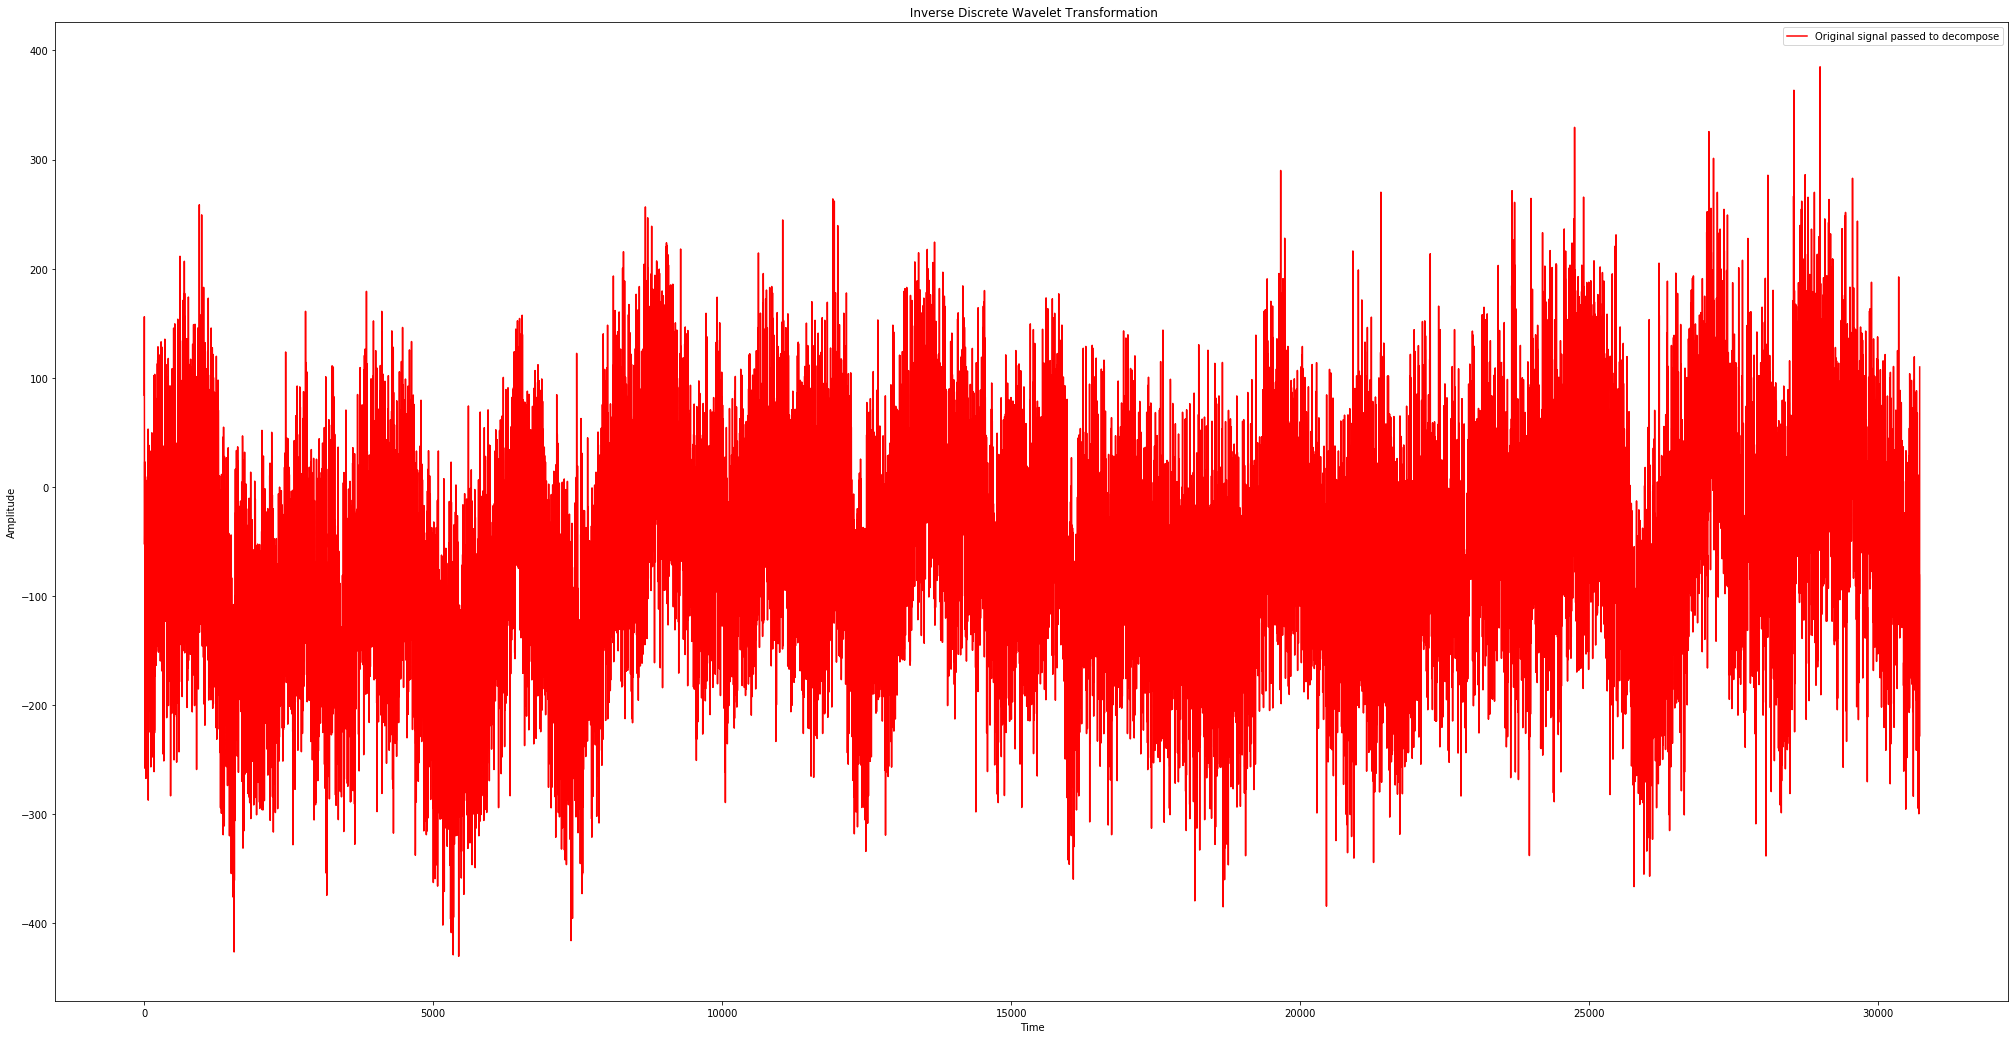

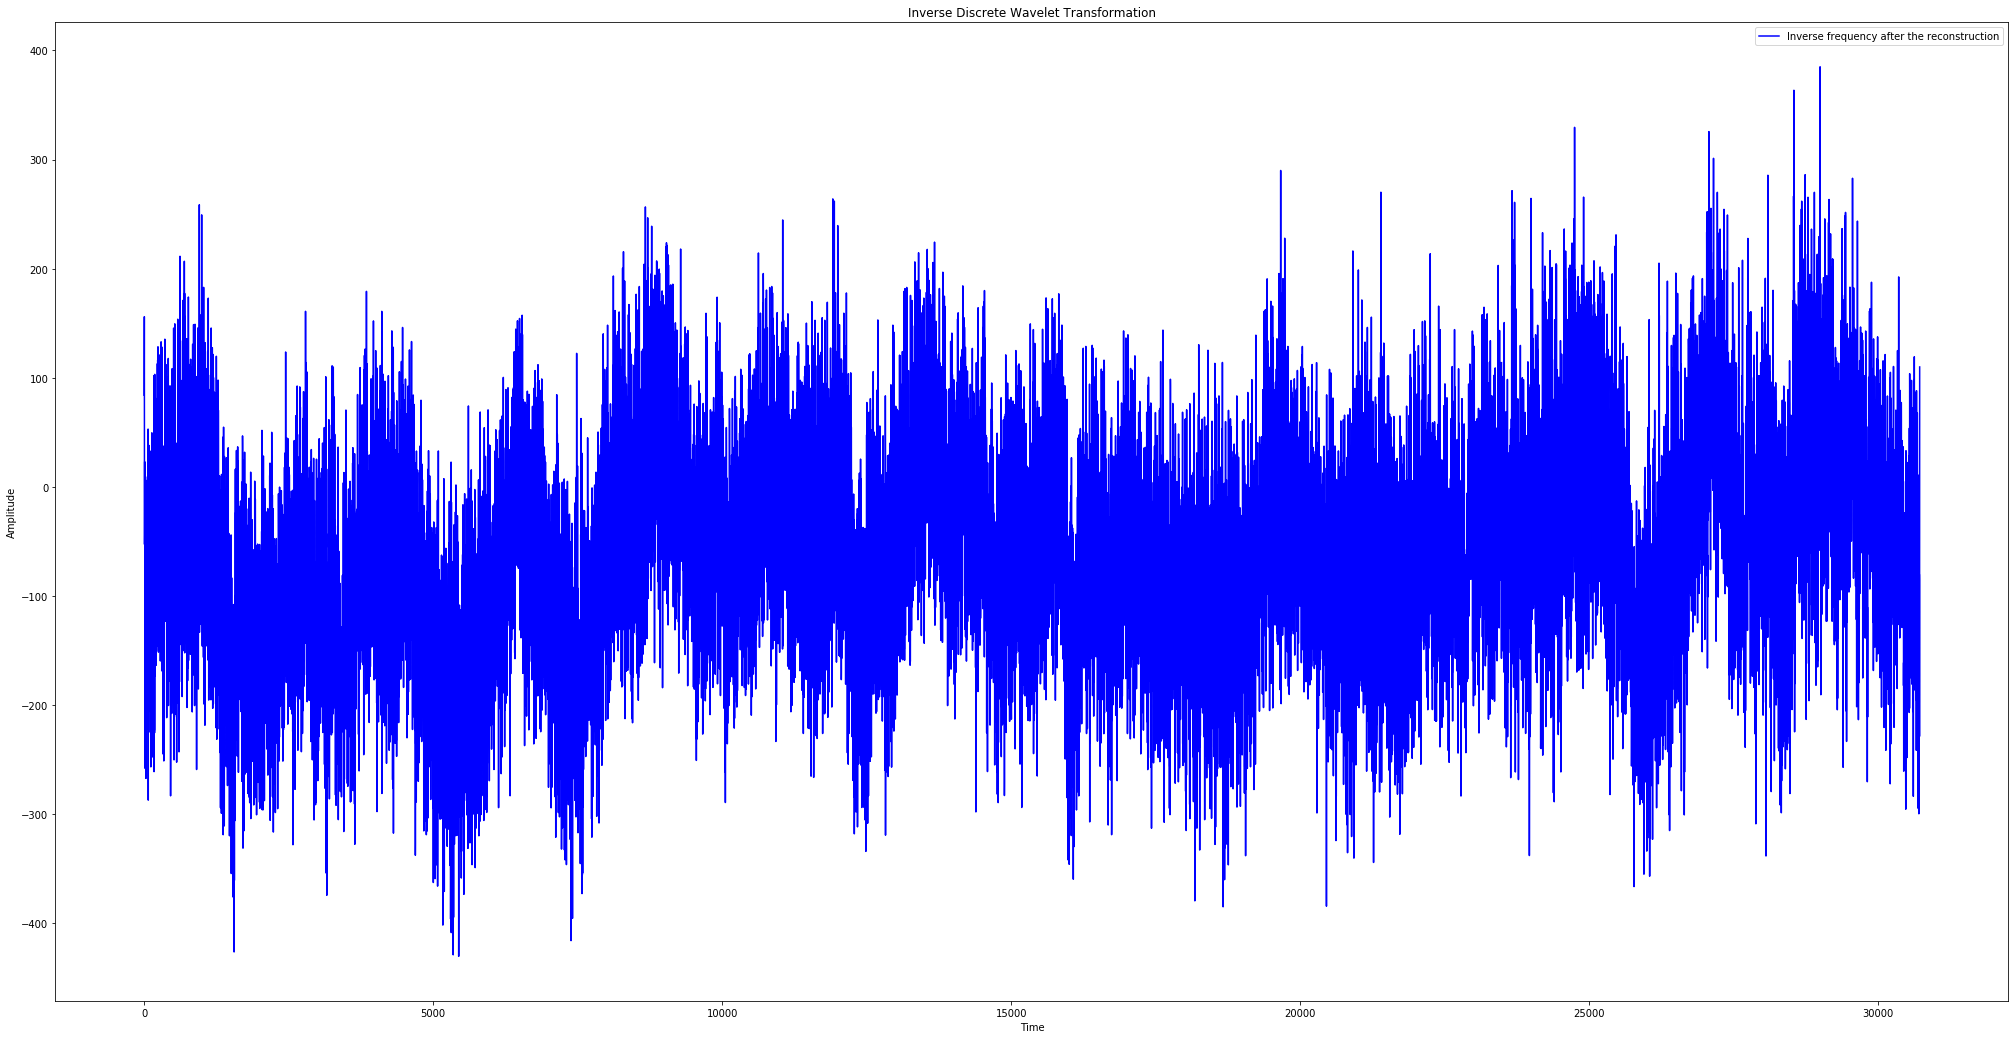

In [5]:
inverse=pywt.waverec(coeffs, 'db7')
print(len(inverse))
print(len(x))

print(np.corrcoef(x,inverse))

plt.figure(figsize=(35, 18))
plt.plot(x, color='red', label="Original signal passed to decompose")
#plt.plot(inverse, color='blue', label="Inverse frequency after the reconstruction")
#plt.plot(diff, color='gray', label="Changes")
plt.title(" Inverse Discrete Wavelet Transformation")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(35, 18))
#plt.plot(x, color='red', label="Original signal passed to decompose")
plt.plot(inverse, color='blue', label="Inverse frequency after the reconstruction")
#plt.plot(diff, color='gray', label="Changes")
plt.title("Inverse Discrete Wavelet Transformation")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:


M = pywt.idwt(D2, None, 'db7', 'smooth')
N = pywt.idwt(None, cA2, 'db7', 'smooth')

D1=M + N

C = pywt.idwt(D1, None, 'db7', 'smooth')
D = pywt.idwt(None,cA1, 'db7', 'smooth')


C 


In [ ]:
                                    #  CODE WITHOUT USING LIBRARY #

In [41]:
import numpy as np
import openpyxl
from sympy import *
import sys

In [46]:
loc=('G:\music_data\M01\SONG 2\M01_C4.xlsx')
w=openpyxl.load_workbook(loc)

sheet=w.get_active_sheet()
c=5
r=sheet.max_row

x=[]
for i in range(2,r):
    x.append(sheet.cell(row=i,column=1).value)
#print(x)


sys.displayhook = pprint
x = Symbol('x')
integrate(x**2 + x + 1, x)

<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<ipython-input-46-66df19a49859>:1: DeprecationWarning: invalid escape sequence \m
  loc=('G:\music_data\M01_C4.xlsx')
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  after removing the cwd from sys.path.


x**3/3 + x**2/2 + x

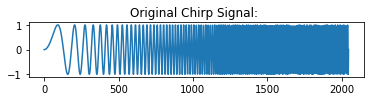

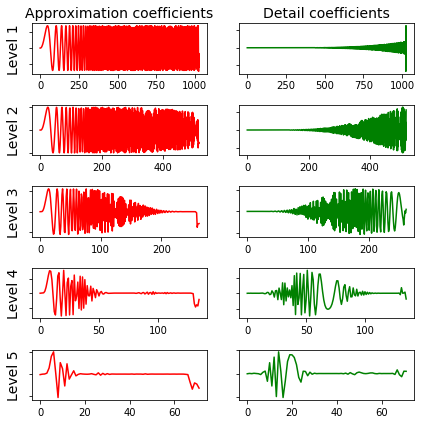

In [7]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

In [22]:
loc=('G:\music_data\M01_C4.xlsx')
w=openpyxl.load_workbook(loc)

sheet=w.get_active_sheet()
c=5
r=sheet.max_row
db1=1
x=[]
for i in range(2,r):
    x.append(sheet.cell(row=i,column=c).value)
#print(x)
(cA, cD) = pywt.dwt(x, 'db7')

a=cA.size

#for i in range(0,a):
    #sheet.cell(row=i+1,column=8).value=cA[i]   #saving the gamma data to the excel
print('gamma')
print(cA)
print(cD)

<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<ipython-input-22-bd0f880a6ee9>:1: DeprecationWarning: invalid escape sequence \m
  loc=('G:\music_data\M01_C4.xlsx')


gamma
[  79.66138839  -82.2108881    25.65410705 ...  -23.09605614 -122.86100608
  -49.06693001]
[-48.96648072  57.92489393 -41.2479394  ... -28.21098162  23.21031237
  -9.15492062]


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  after removing the cwd from sys.path.
